# 0. 데이터 수집
- 공개된 데이터셋을 활용함.
- [데이터셋 출처 링크 (kaggle)](https://www.kaggle.com/datasets/ayeshaseherr/student-performance/data)
- 약 627KB의 csv 파일

# 1. 데이터 불러오기 / 확인하기
- 편의상 드라이브 마운트를 사용함.

In [184]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [169]:
data = pd.read_csv("/content/drive/MyDrive/25-2/StudentPerformanceFactors.csv")
or_df = pd.DataFrame(data)
or_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [170]:
print("dataframe size(row, col):\n", or_df.shape)

dataframe size(row, col):
 (6607, 20)


In [171]:
print("cols(features):\n", or_df.columns)

cols(features):
 Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')


In [172]:
or_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [173]:
or_df.describe()   # integers type features만 나옴.

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [174]:
# feature 마다 결측치 수 확인
or_df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


- **결측치가 존재하는 columns**: Teacher_Quality, Parental_Education_Level, Distance_from_Home
- 모두 object type이다.

# 2. 필요한 feature만 사용하기
  - 시험 점수에 영향을 주는 특징들을 통해 모델을 학습시킨 뒤, 주기적으로 나의 상태를 모델에 입력해서 예상 기말 점수를 확인할 것이다.
  - 성별, 학교 유형(대학교) 등은 고정된 특징이므로, 내가 스스로 바꿀 수 있는 요소를 입력으로 받아야 한다.

  - 바꿀 수 있는 요소:
  Hours_Studied, Attendance, Extracurricular_Activities, Sleep_Hours, Tutoring_Sessions, Physical_Activity

In [175]:
df = or_df[['Hours_Studied', 'Attendance', 'Extracurricular_Activities', 'Sleep_Hours', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']]
df

,Hours_Studied,Attendance,Extracurricular_Activities,Sleep_Hours,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,No,7,0,3,67
1,19,64,No,8,2,4,61
2,24,98,Yes,7,2,4,74
3,29,89,Yes,8,1,4,71
4,19,92,Yes,6,3,4,70
...,...,...,...,...,...,...,...
6602,25,69,No,7,1,2,68
6603,23,76,No,8,3,2,69
6604,20,90,Yes,6,3,2,68
6605,10,86,Yes,6,2,3,68


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Extracurricular_Activities  6607 non-null   object
 3   Sleep_Hours                 6607 non-null   int64 
 4   Tutoring_Sessions           6607 non-null   int64 
 5   Physical_Activity           6607 non-null   int64 
 6   Exam_Score                  6607 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 361.4+ KB


In [176]:
print("new dataframe size:\n", df.shape)

new dataframe size:
 (6607, 7)


- column size가 변화했다.

## 2.1. 결측치 확인

In [177]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Extracurricular_Activities,0
Sleep_Hours,0
Tutoring_Sessions,0
Physical_Activity,0
Exam_Score,0


- 원래 데이터셋에는 결측치가 있었으나, 선택한 feature로 이루어진 데이터셋에서는 결측치가 발생하지 않음.
- 별도로 처리할 필요가 없음.

## 2.2 이상치 확인 (시각화)
- column마다 값 분포 시각화를 통해 확인

In [178]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,8.000000,6.000000,101.000000


- 'Attendance' 의 표준편차가 비교적 높음 (약 11.55)
- 'Exam_Score'의 최댓값이 101
  - 100점을 초과하는 점수 존재
  - 반드시 이상치는 아님: 보너스로 받은 점수일 수도 있다

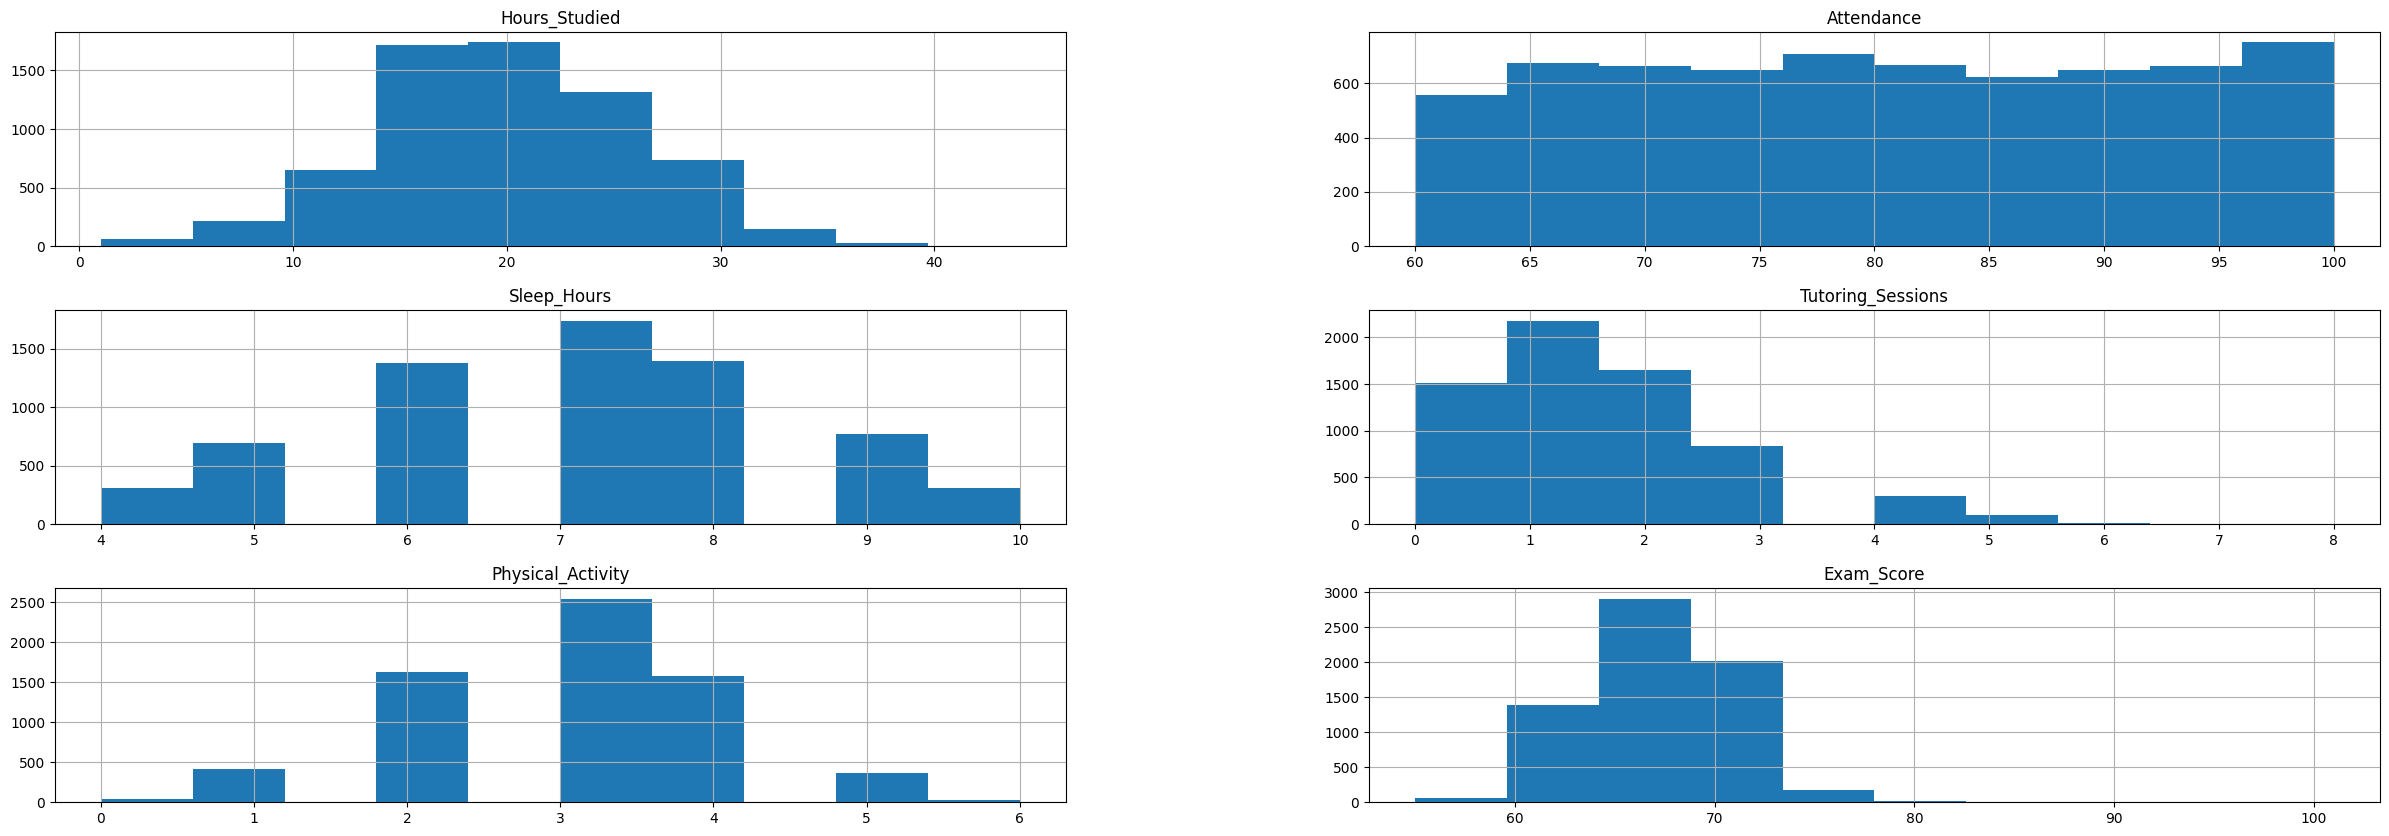

In [179]:
h = df.hist(figsize = (30, 10))

- 직관적으로 확인했을 때, 컬럼 값들의 분포가 정규 분포에 가깝거나 특정 구간에 모여 있으므로 이상치가 존재한다고 보기 어려움

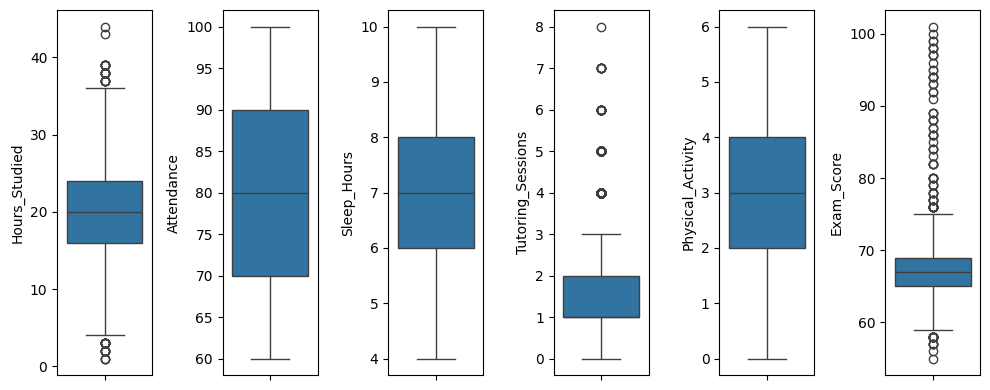

In [180]:
# 사분위수를 활용한 boxplot 그리기
fig, axes = plt.subplots(1, 6, figsize=(10,4))
sns.boxplot(y=df['Hours_Studied'], ax=axes[0])
sns.boxplot(y=df['Attendance'], ax=axes[1])
sns.boxplot(y=df['Sleep_Hours'], ax=axes[2])
sns.boxplot(y=df['Tutoring_Sessions'], ax=axes[3])
sns.boxplot(y=df['Physical_Activity'], ax=axes[4])
sns.boxplot(y=df['Exam_Score'], ax=axes[5])

plt.tight_layout()
plt.show()

- 공부 시간, 튜터 수업 시간, 시험 점수는 boxplot 바깥 값이 존재함.
- 그러나, 해당 feature들의 특성상, 데이터는 다양한 수치를 가질 수 있음.
- 위의 코드 실행 결과, 최솟값/최댓값/분포에 이상이 없었으므로 이상치로 생각하지 않아도 된다.

## 2.3. 불균형 확인 (시각화)

<Axes: xlabel='Exam_Score', ylabel='count'>

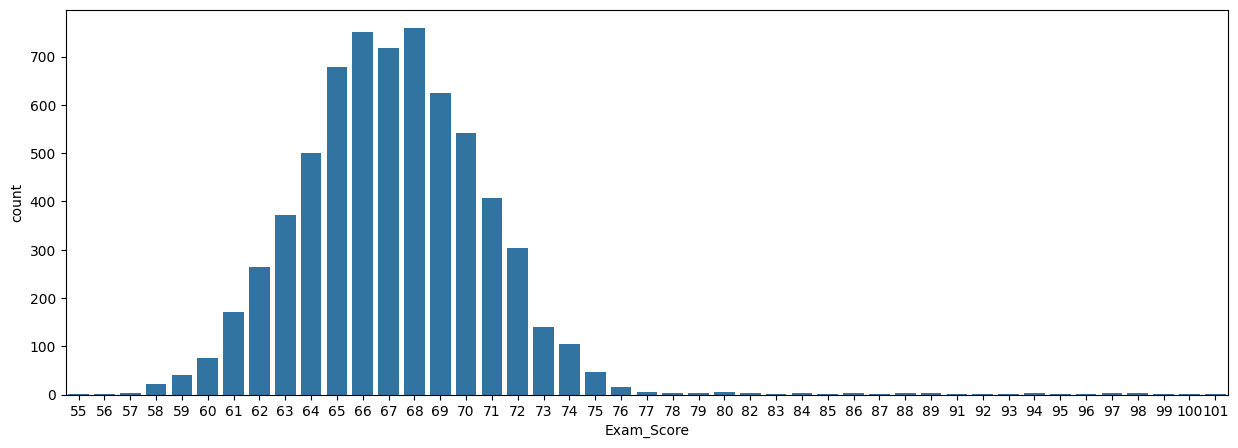

In [181]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='Exam_Score')

- 시험 점수는 numerical 데이터이다. (categorical 아님)
- 값의 분포가 정규분포에 가까움.
- 이 데이터의 시험점수는 대부분 60점대이다.

## 2.4. 중복된 샘플 확인
- 이 데이터는 실제로 같은 값의 샘플이 존재할 수 있음.
- 개수 확인만 하고 제거하지 않을 것이다.

In [182]:
print(df.duplicated().sum())

32


##2.5. 상관관계 확인
- 문자열의 경우 인코딩하여 확인

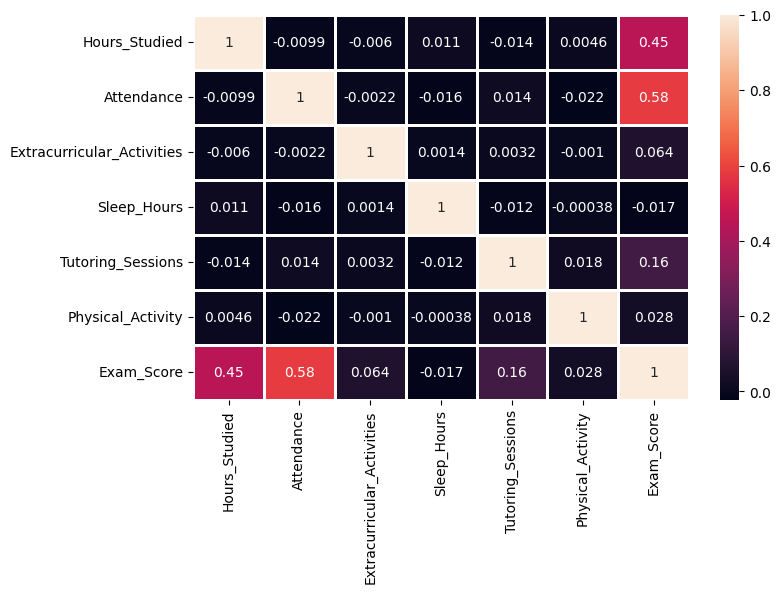

In [193]:
df = pd.get_dummies(df, drop_first=True)   # 인코딩

corr_matrix = df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot = True, linewidths=1)
plt.show()

- 절댓값 0.4 이상의 상관관계:
  - 'Exam_Score' 와 'Hours_Studied'
  - 'Exam_Score' 와 'Attendance'

## 정규화 (normalization) - 나중에
- 내가 보는 시험 점수의 분포는 위 dataset과 다르다. (평균, 분산)
- 모델을 실생활에 적용할 때는 정규화가 필요할 것이다.